#### **1. Estrategia FCFS** 

El algoritmo Greedy resuelve el problema de asignación siguiendo el criterio FCFS, tomando para cada pasajero el conductor más cercano. 
La clase GreedySolver implementa un algoritmo para obtener una solución al problema de asignación de taxis a pasajeros.
La clase contiene:
- Constructor predeterminado GreedySolver::GreedySolver(): Es el constructor por defecto de la clase. 

- Constructor GreedySolver::GreedySolver(TaxiAssignmentInstance &instance): Este constructor toma una instancia de asignación de taxis (TaxiAssignmentInstance) como parámetro y la utiliza para inicializar el objeto GreedySolver. Establece los valores iniciales para las variables de la instancia y la solución.

- GreedySolver::setInstance(TaxiAssignmentInstance &instance): Este método permite establecer una instancia de asignación de taxis después de la creación del objeto GreedySolver.

- GreedySolver::solve(): Este método implementa el algoritmo para resolver el problema de asignación de taxis a pasajeros. A continuación, se describen los pasos principales dentro de este método:
    - Se inicializa un cronómetro para medir el tiempo de resolución del algoritmo.

    - Se crea una solución inicial vacía (TaxiAssignmentSolution) basada en el número de pasajeros de la instancia.

    - Se itera sobre cada pasajero y se asigna el taxi más cercano disponible (no asignado previamente) a ese pasajero.

    - Se calcula el valor objetivo de la solución sumando las distancias recorridas por cada taxi hasta su pasajero asignado.

    - Se detiene el cronómetro y se calcula el tiempo de resolución.

- GreedySolver::getObjectiveValue() const: Este método devuelve el valor objetivo de la solución calculado durante la resolución del problema.

- GreedySolver::getSolution() const: Este método devuelve la solución de asignación de taxis resultante.

- GreedySolver::getSolutionStatus() const: Este método devuelve el estado de la solución (puede ser utilizado para indicar si la solución es factible, óptima, etc.). En esta implementación, siempre devuelve 0, lo cual no proporciona información específica sobre el estado.

- GreedySolver::getSolutionTime() const: Este método devuelve el tiempo de resolución de la solución en milisegundos.


#### **2. Modelo para estrategia de batching.** 

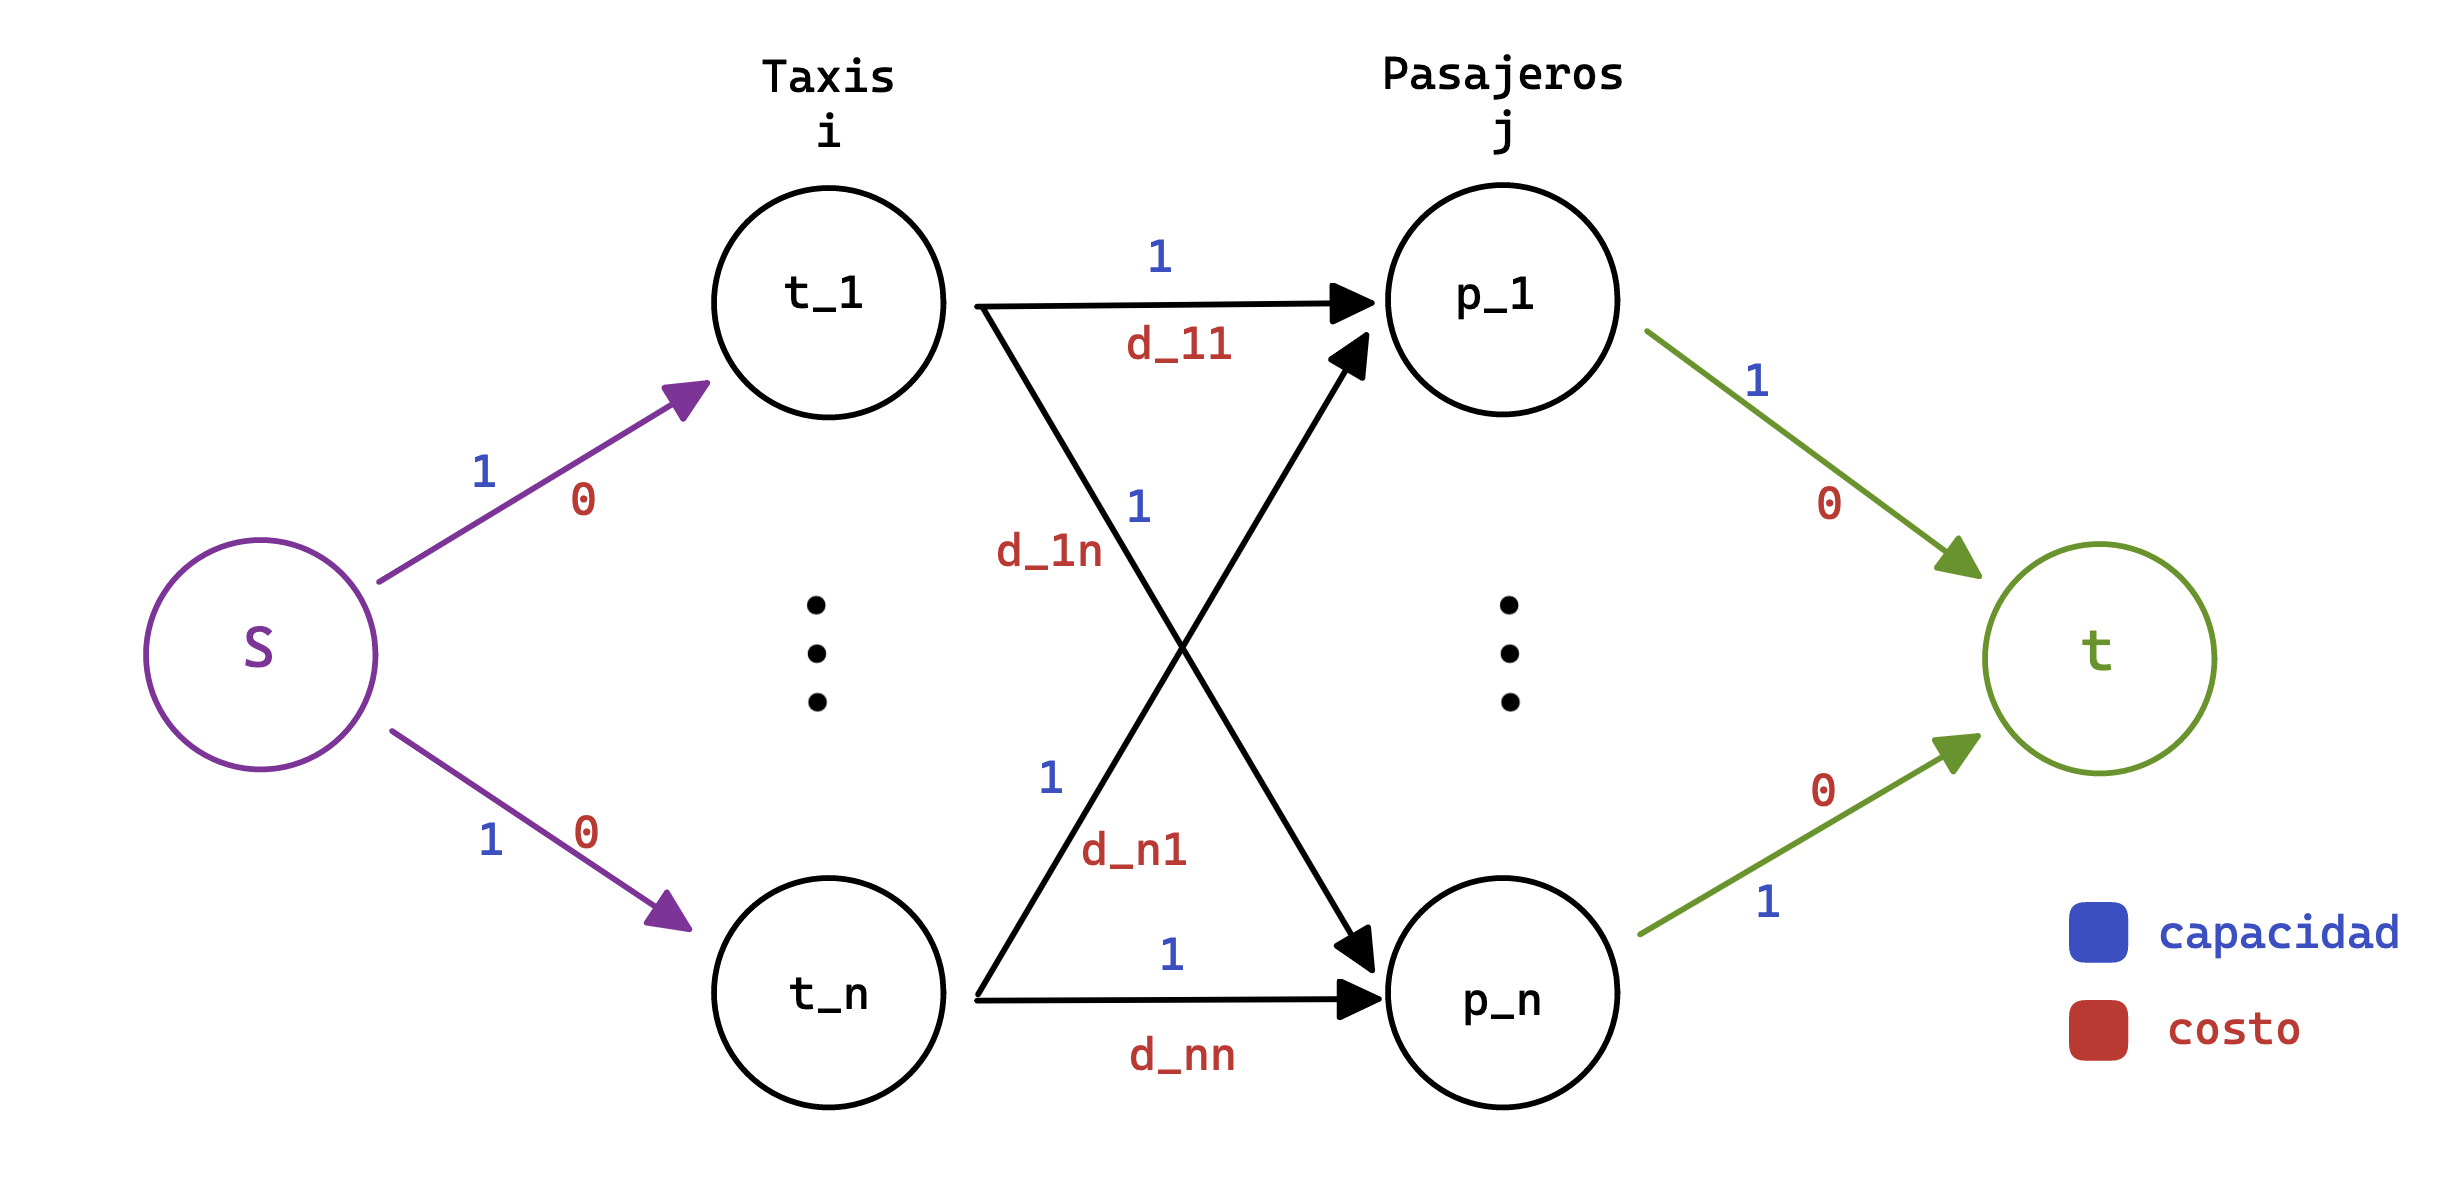

In [2]:
from IPython.display import Image
Image(filename='img/img_grafoModelado.png')

Tenemos n taxis y n pasajeros y queremos asignarle a cada taxi un único pasajero de modo de encontrar para cada pasajero el taxi más cercano con la estrategia de Batching, la cual minimiza la distancia recorrida por los vehículos hasta la ubicación de su pasajero asignado.

Para modelar el problema de asignación taxi-pasajero con la estrategia de Batching, vamos a utilizar  un digrafo D = (N,A) con nodos s, t incluidos en N de origen y destino. Una función de capacidad u: A->Z+ asociada con los arcos y una función de costo c: A->Z para cada arco.

Ahora, conectamos con una arista dirigida cada nodo t_i (de los n taxis) a todos los nodos p_j (de los n pasajeros) porque cualquier taxi puede llevar a cualquier pasajero. Cada arista con capacidad 1 y costo d_ij (distancia entre taxi i y pasajero j).

Luego, agregamos un nodo s y un nodo t y conectamos a s con todos los nodos t_i mediante aristas dirigidas s->t_i. Recordemos que cada taxi puede llevar a un único pasajero, por lo que debemos limitar la cantidad de flujo que llega a cada uno de los taxis t_i. Para ello, podemos asignarle a cada arista s->t_i una capacidad de 1. 
A su vez, conectamos a todos los nodos p_j a t mediante aristas dirigidas p_j->t, con  capacidad 1 por la ley de conservación de flujo. 
Todas las aristas que salen de s y entran a t, tendran costo 0.

Para encontrar la solución al problema, debemos seguir los siguientes pasos:
1. Aplicamos Edmonds y Karp para obtener el flujo máximo. 
2. Como queremos minimizar la distancia total de cada taxi a cada pasajero asignado, para encontrar la mejor solución al problema, aplicaremos al flujo factible el algoritmo de Klein (cancelación de ciclos).

#### **3. Implementación estrategia de batching.** 




Como explicamos en el ejercicio anterior, la estrategia de batching busca resolver el problema de asignación taxi-pasajero minimizando la distancia recorrida por los taxis hasta la ubicación de su pasajero asignado.
Para ello, definimos la clase BatchingSolver que implementa un algoritmo que resuelve dicho problema. La clase contiene:
- Constructor predeterminado BatchingSolver::BatchingSolver(): Es el constructor por defecto de la clase. No realiza ninguna operación específica.

- Constructor BatchingSolver::BatchingSolver(TaxiAssignmentInstance &instance): Este constructor toma una instancia de asignación de taxis (TaxiAssignmentInstance) como parámetro y la utiliza para inicializar el objeto BatchingSolver. Establece los valores iniciales para las variables de la instancia y la solución.

- BatchingSolver::setInstance(TaxiAssignmentInstance &instance): Este método permite establecer una instancia de asignación de taxis después de la creación del objeto BatchingSolver.

- BatchingSolver::solve(): Este método es el núcleo del solucionador de batching. Implementa el algoritmo para resolver el problema de asignación de taxis a pasajeros utilizando el algoritmo de flujo de costo mínimo. A continuación, se describen los pasos principales dentro de este método:
    - Se inicializa un cronómetro para medir el tiempo de resolución utilizando batching.
    - Se crea una solución inicial vacía (TaxiAssignmentSolution) basada en el número de pasajeros de la instancia.
    - Se crea una red de flujo mínimo (_min_cost_flow) utilizando la información de la instancia de asignación de taxis.
    - Se resuelve el problema de flujo de costo mínimo (_min_cost_flow.Solve()) y se guarda el estado de la solución en _solution_status.
    - Si el estado de la solución es óptimo (operations_research::MinCostFlow::OPTIMAL), se procesan las aristas de la solución para construir la solución asignando taxis a pasajeros.
    - Se calcula el valor objetivo de la solución sumando los costos de las aristas en la solución.
    - Si el estado de la solución no es óptimo, se imprime un mensaje indicando que la resolución del problema de flujo de costo mínimo falló.
    - Se detiene el cronómetro y se calcula el tiempo de resolución.


- BatchingSolver::_createMinCostFlowNetwork(): Este método privado se utiliza dentro del método solve() para crear la red de flujo de costo mínimo. Se inicializan las estructuras necesarias para representar el grafo del problema. Se agregan las aristas correspondientes a las conexiones entre los taxis y los pasajeros, estableciendo las capacidades y los costos unitarios en base a la distancia entre ellos. También se establecen las "supplies" de los nodos, que indican cuánto flujo entra o sale de cada nodo (1 para los taxis y -1 para los pasajeros). Finalmente, se agregan las aristas y las supplies a la instancia del flujo de costo mínimo _min_cost_flow.

- BatchingSolver::getObjectiveValue() const: Este método devuelve el valor objetivo de la solución calculado durante la resolución del problema.

- BatchingSolver::getSolution() const: Este método devuelve la solución de asignación de taxis resultante.

- BatchingSolver::getSolutionStatus() const: Este método devuelve el estado.

#### **5. Discusión y análisis de resultados.** 


Los datos dispuestos en el archivo *resultados.csv* se obtuvieron a partir de la experimentación sobre todas las instancias comparando el modelo Greedy Solver con el modelo Taxi Batching. Las métricas que consideramos relevantes para el análisis de estos modelos fueron las siguientes:

- Valor de la función objetivo: corresponde a la suma de lo costos de las aristas de los taxis a los pasajeros asignados.
- Tiempo de resolución: corresponde al tiempo que tarda el modelo en obtener una solución. 
- Mejora porcentual: 
$\%\text{Gap}= \frac{z_g - z_b}{z_b}$

A partir de la tabla, podemos notar que los valores de la función objetivo del modelo Greedy Solver son mayores que los de Taxi Batching. Esto es razonable ya que en el algoritmo Greedy no se tiene en cuenta el costo asociado con cada asignación y simplemente se elige la opción mas conveniente en ese momento, lo cual puede resultar en una mayor distancia total recorrida. En cambio, el algoritmo Taxi Batching busca minimizar el costo total asociado con el transporte de los pasajeros.

Por el contrario, el tiempo de resolución del algoritmo Taxi Batching es mayor que la resolución del algoritmo Greedy. Esto es coherente ya que este suele tener una complejidad computacional más baja en comparación con los algoritmos de optimización más avanzados, como el Taxi Batching. El algoritmo Greedy suele tomar decisiones locales basadas en información limitada en cada paso, lo que reduce la cantidad de cálculos necesarios. Por otro lado, el algoritmo de Taxi Batching implica la resolución de un problema de flujo máximo con restricciones y costos asociados, lo que puede requerir más operaciones y cálculos complejos.

En otras palabras, Greedy es relativamente fácil de implementar y entender. No requiere una estructura de datos o algoritmos complicados para su ejecución. Pero Taxi Batching puede requerir una implementación más compleja y detallada, lo que puede llevar más tiempo de desarrollo y resolución.

Por lo mencionado anteriormente, tiene sentido que la mejora porcentual de la función objetivo sea positiva ya que estamos calculando cual es el porcentaje de aumento de distancia del algoritmo Greedy Solver en comparación al Taxi Batching. Por el contrario, al calcular la mejora porcentual del tiempo de resolución esta es negativa ya que estamos calculando cual es el porcentaje de disminución de tiempo del algortmo Greedy Solver en comparación al Taxi Batching.

In [3]:
import pandas as pd
data = pd.read_csv('resultados.csv')
data

,Tamaño de Muestra,Función Objetivo Greedy,Función Objetivo Batching,Tiempo Greedy,Tiempo Batching,%Gap (Función Objetivo),%Gap (Tiempo de Resolución)
0,10,36.9,29.3,0.003458,1.135120,0.259386,-0.996954
1,10,42.4,32.4,0.002500,0.051875,0.308642,-0.951807
2,10,65.6,56.9,0.002834,0.067583,0.152900,-0.958066
3,10,29.5,23.7,0.002792,0.040958,0.244726,-0.931833
4,10,33.9,30.8,0.002750,0.040125,0.100649,-0.931464
5,10,63.6,54.4,0.002625,0.050042,0.169118,-0.947544
6,10,44.9,41.0,0.002333,0.042583,0.095122,-0.945213
7,10,56.3,46.9,0.002584,0.053417,0.200426,-0.951626
8,10,38.1,35.5,0.002666,0.051666,0.073239,-0.948399
9,10,58.1,49.7,0.002500,0.050666,0.169014,-0.950657


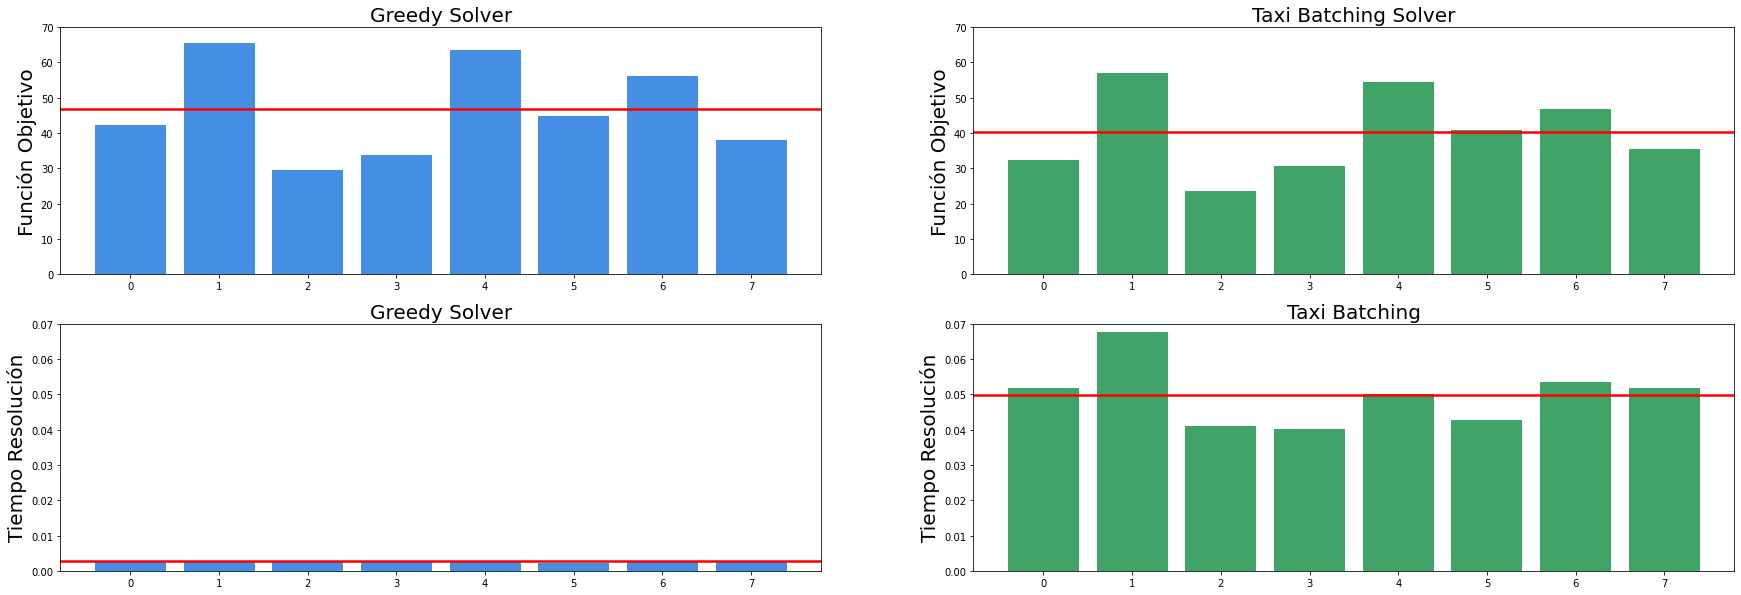

In [99]:
import matplotlib.pyplot as plt
data_res = pd.read_csv('resultados.csv', nrows=8, skiprows=range(1,2))

fig, ((ax4, ax5), (ax6, ax7)) = plt.subplots(2, 2, figsize=(30, 10))
y4 = data_res['Función Objetivo Greedy']
x4 = range(len(y4))
ax4.bar(x4, y4, color='#448ee4')
ax4.set_ylabel('Función Objetivo', fontsize=20)
ax4.set_xticks(x4,  [str(numero) for numero in x4])
ax4.axhline(data_res['Función Objetivo Greedy'].mean(), color='red', label='mean', linewidth=2.5)
ax4.set_title('Greedy Solver', fontsize=20)
ax4.set_ylim(0, 70)

y5 = data_res['Función Objetivo Batching']
x5 = range(len(y5))
ax5.bar(x5, y5, color='#40a368')
ax5.set_ylabel('Función Objetivo', fontsize=20)
ax5.set_xticks(x5,  [str(numero) for numero in x5])
ax5.axhline(data_res['Función Objetivo Batching'].mean(), color='red', label='mean', linewidth=2.5)
ax5.set_title('Taxi Batching Solver', fontsize=20)
ax5.set_ylim(0, 70)

y6 = data_res['Tiempo Greedy']
x6 = range(len(y6))
ax6.bar(x6, y6, color='#448ee4')
ax6.set_ylabel('Tiempo Resolución', fontsize=20)
ax6.set_xticks(x6,  [str(numero) for numero in x6])
ax6.axhline(data_res['Tiempo Greedy'].mean(), color='red', label='mean', linewidth=2.5)
ax6.set_title('Greedy Solver', fontsize=20)
ax6.set_ylim(0, 0.07)

y7 = data_res['Tiempo Batching']
x7 = range(len(y7))
ax7.bar(x7, y7, color='#40a368')
ax7.set_ylabel('Tiempo Resolución', fontsize=20)
ax7.set_xticks(x7,  [str(numero) for numero in x7])
ax7.axhline(data_res['Tiempo Batching'].mean(), color='red', label='mean', linewidth=2.5)
ax7.set_title('Taxi Batching', fontsize=20)
ax7.set_ylim(0, 0.07)

plt.show()

#### **6. Limitaciones y posibles extensiones.** 

La problemática planteda no es considerada por la clase TaxiBatching ya que esta última se centra únicamente en minimizar la distancia recorrida por los conductores hasta los pasajeros, sin tener en cuenta que la distancia que recorren luego para llevar al pasajero puede ser muy corta. Sin embargo, en la realidad esto es un problema ya que la sensación de los conductores es que es mucho el costo de buscar a un pasajero, ya sea en costo específico o en el tiempo utilizado y que podrían destinar a un viaje mas rentable, en relación al beneficio obtenido por el viaje en sí mismo. 

Por esta razón, propusimos una modificación al modelo de Taxi Bathing y la implementamos en la nueva clase TaxiBatchingModificada. La clase TaxiBatchingModificada va a resolver el problema de flujo de costo minimo enfocándose en mejorar la eficiencia y la satisfacción de los conductores. Para ello, el nuevo modelo tiene como funcion de costo el ratio de distancia, que se calcula al dividir la distancia del taxi al pasajero por la distancia del pasajero al destino. 

Esta es una métrica que proporciona una medida relativa de la eficiencia en la asignación de viajes. Este ratio puede interpretarse de la siguiente manera:

- Un ratio mayor a 1 indica que la distancia que el taxi debe recorrer para llegar al pasajero es mayor que la distancia que el pasajero necesita para llegar a su destino. Esto significa que el costo de buscar al pasajero es relativamente alto en comparación con el beneficio del viaje. En otras palabras, el tiempo y el esfuerzo requeridos para recoger al pasajero pueden considerarse desproporcionadamente altos en relación con la distancia y el tiempo del viaje en sí mismo.

- Un ratio menor a 1 indica que la distancia de taxi a pasajero es menor que la distancia de pasajero a destino. En este caso, el costo de buscar al pasajero es relativamente bajo en relación con el beneficio del viaje. Esto implica que el tiempo y el esfuerzo invertidos en la recogida del pasajero son proporcionalmente menores en comparación con la distancia y el tiempo del viaje en sí mismo.

Al utilizar el ratio de distancia como costo en las aristas, el algoritmo de Taxi Batching Modificado buscará encontrar una asignación eficiente de viajes que minimice la distancia total recorrida por los taxis. Al considerar este ratio, se asignarán preferentemente los viajes en los que la distancia de recogida sea relativamente más corta en comparación con la distancia de destino. Esto ayuda a reducir la distancia total que los taxis deben recorrer para completar los viajes.

A continuación proporcionamos un modelado de este nuevo algoritmo...

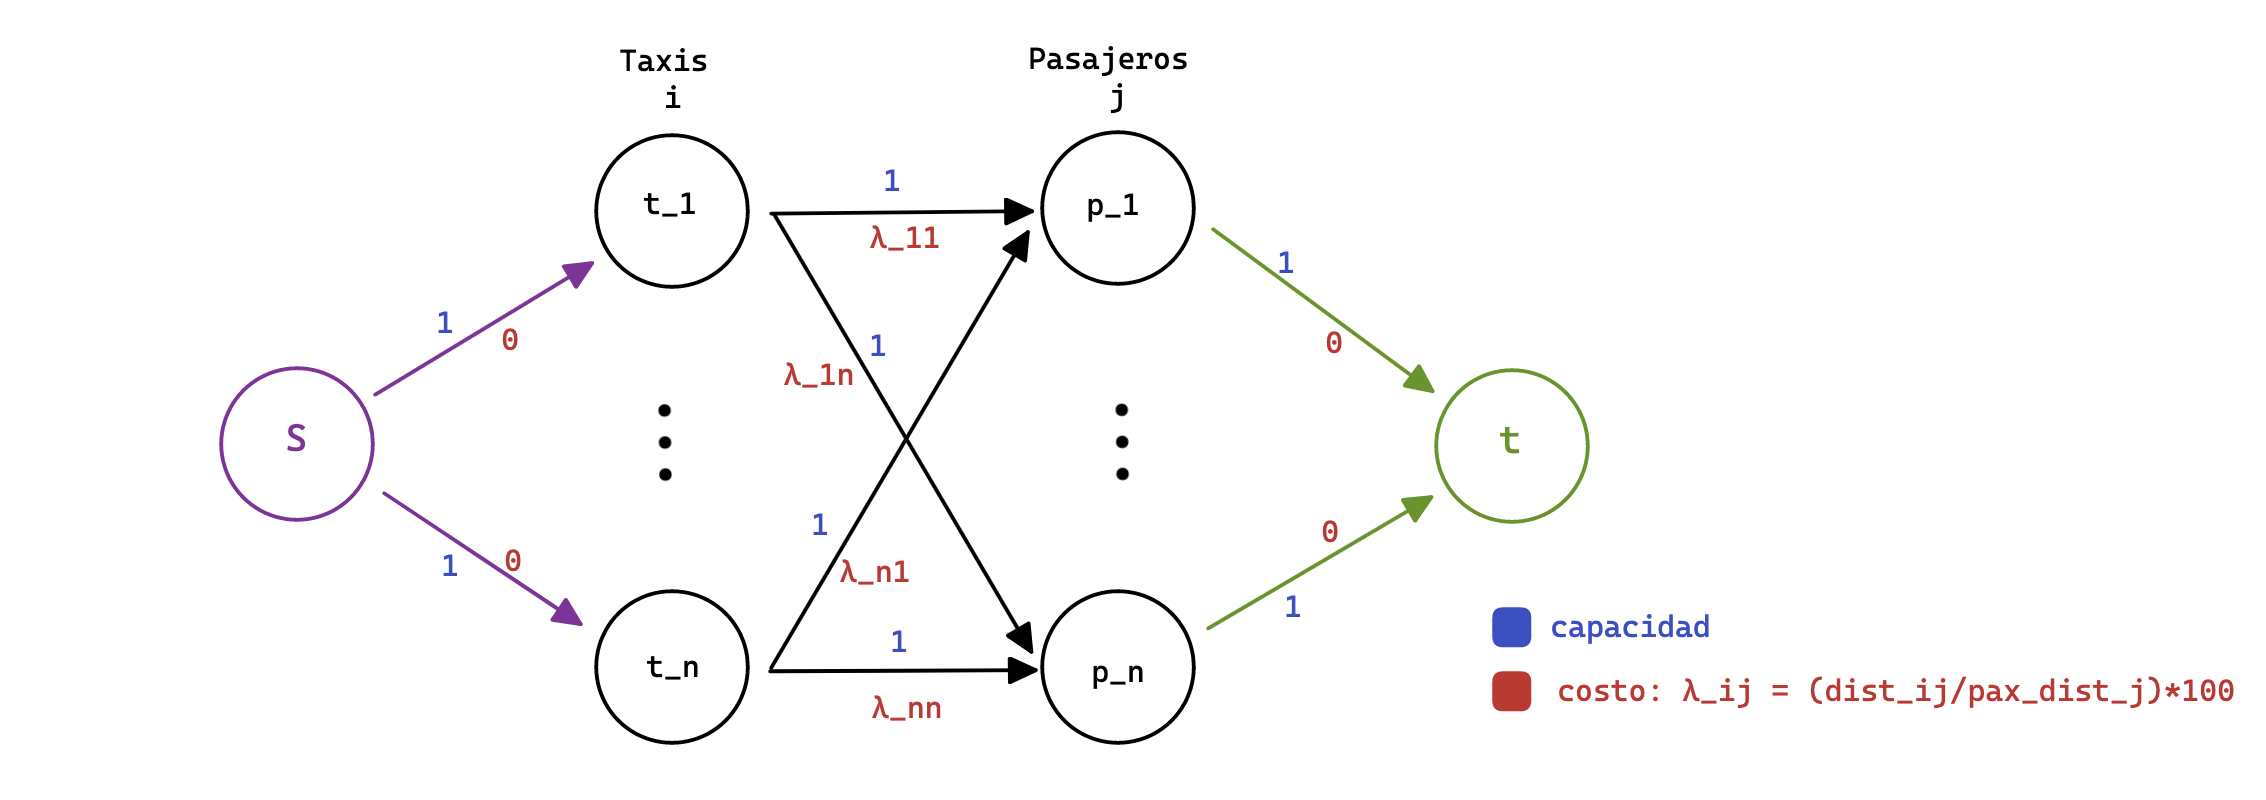

In [3]:
from IPython.display import Image
Image(filename='img/img_grafoModeladoModificado.png')

#### **7. Modelo alternativo.**

Los datos presentados en la tabla nos permiten visualizar los resultados del valor de la función objetivo y el ratio de distancia para poder compararlos y analizar como se diferencian entre los tres los modelos. 

En primer lugar, el valor de la función objetivo representa la distancia total recorrida por los conductores para buscar a los pasajeros. Como el nuevo modelo TaxiBtachingModificado va a minimizar la distancia total recorrida por los taxis pero además priorizando viajes que tienen menor distancia para buscar el pasajero que distancia de viaje, podemos asegurar que el valor de la función objetivo va a ser mayor que el valor de la función objetivo del modelo TaxiBatching original que solo minimiza la distancia recorrida por los vehículos hasta la ubicación de su pasajero asignado, y tambien que va a ser mucho menor que el valor de la función objetivo del modelo GreedySolver que se enfoca en asignar cada pasajero al taxi mas cercano de manera local.

Por otro lado, el ratio de distancia se obtiene a partir del cociente entre la distancia que recorre el conductor para buscar al pasajero y la distancia del viaje del pasajero. Como este ratio es el valor que se utiliza como costo de las aristas de la clase TaxiBatchingModificado, esta claro que el promedio de este ratio va a ser menor que en el resto de los modelos debido a que el modelo ya resuelve el flujo de costo minimo considerando este valor, por lo que la solución de asignación de taxi a pasajero minimiza este cociente para cada uno de los viajes. Luego, el promedio está minimizado tambien. 
En cambio, los modelos TaxiBatching y Greedy no consideran las distancias de viaje para realizar las asignaciones. 



In [9]:
import pandas as pd
data = pd.read_csv('resultados_nuevos.csv')
data

,Función Objetivo Greedy,Función Objetivo Taxi Batching,Función Objetivo Batching Modificado,Ratio Distancia Greedy,Ratio Distancia Taxi Batching,Ratio Distancia Batching Modificado
0,36.9,29.3,30.0,233.605,155.6090,112.0250
1,42.4,32.4,33.0,141.662,86.0936,60.4664
2,65.6,56.9,62.7,345.319,294.7880,264.0850
3,29.5,23.7,24.4,174.853,158.1930,92.9270
4,33.9,30.8,32.2,136.098,152.4640,91.5424
5,63.6,54.4,56.4,277.130,212.5300,181.8970
6,44.9,41.0,44.2,321.365,234.3440,128.5990
7,56.3,46.9,56.5,120.383,130.7610,102.6590
8,38.1,35.5,37.7,257.545,214.0460,148.9490
9,58.1,49.7,50.5,309.314,373.9800,229.5940


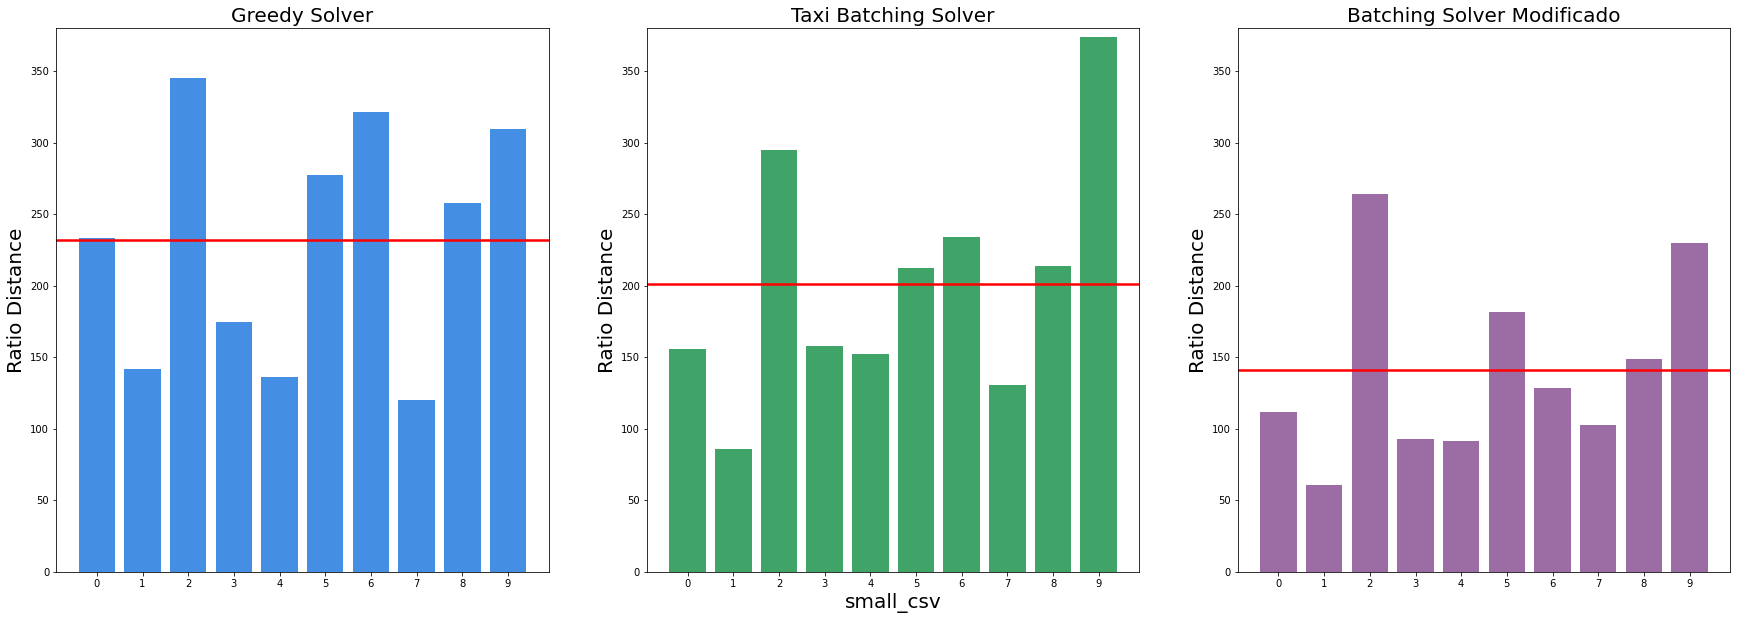

In [78]:
import matplotlib.pyplot as plt
data2 = pd.read_csv('resultados_nuevos.csv', nrows=10)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30, 10))
y1 = data2['Ratio Distancia Greedy']
x = range(len(y1))
ax1.bar(x, y1, color='#448ee4')
ax1.set_ylabel('Ratio Distance', fontsize=20)
ax1.set_xticks(x,  [str(numero) for numero in x])
ax1.axhline(data2['Ratio Distancia Greedy'].mean(), color='red', linewidth=2.5)
ax1.set_title('Greedy Solver', fontsize=20)
ax1.set_ylim(0, 380)

y2 = data2['Ratio Distancia Taxi Batching']
x2 = range(len(y2))
ax2.bar(x2, y2, color='#40a368')
ax2.set_xlabel('small_csv', fontsize=20)
ax2.set_ylabel('Ratio Distance', fontsize=20)
ax2.set_xticks(x2,  [str(numero) for numero in x2])
ax2.axhline(data2['Ratio Distancia Taxi Batching'].mean(), color='red', linewidth=2.5)
ax2.set_title('Taxi Batching Solver', fontsize=20)
ax2.set_ylim(0, 380)

y3 = data2['Ratio Distancia Batching Modificado']
x3 = range(len(y3))
ax3.bar(x3, y3, color='#9c6da5')
ax3.set_ylabel('Ratio Distance', fontsize=20)
ax3.set_xticks(x3,  [str(numero) for numero in x3])
ax3.axhline(data2['Ratio Distancia Batching Modificado'].mean(), color='red', linewidth=2.5)
ax3.set_title('Batching Solver Modificado', fontsize=20)
ax3.set_ylim(0, 380)
plt.show()